In [1]:
import numpy as np
import torch
np.random.seed(86)
x = np.random.rand(100,1)
# 利用np.random.rand生成形状(100,1)的数组，数组服从(0,1]均匀分布
y = 1 + 2* x + 0.1 * np.random.randn(100,1)
# np.random.randn：生成服从标准正态分布的噪声（均值为0，标准差为0.1）

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()
# 将x，y转换成PyTorch浮点型张量
# 张量（tensor）是PyTorch的核心数据结构，是一种多维数组

In [2]:
learning_rate = 0.1
num_epochs = 1000
# 设置超参数

In [3]:
# 初始化参数
w = torch.randn(1, requires_grad = True)
# requires_grad = True表示开启梯度追踪，以便在训练中通过反向传播更行w
b = torch.zeros(1, requires_grad = True)

In [4]:
# 开始训练
for epoch in range(num_epochs):
    y_pred = x_tensor*w+b
    loss = ((y_pred - y_tensor)**2).mean()
    # 采用均方误差MSE计算损失
    loss.backward()
    # 通过反向传播计算损失对参数w和b的梯度，为参数更新做准备
    with torch.no_grad():
    # 上下文管理器内关闭梯度追踪(参数更新无需记录梯度)
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()
        # 清空w和b的梯度值
        # PyTorch中梯度默认累积，不清空会导致下次方向传播梯度计算错误
print('w:',w)
print('b:',b)

w: tensor([2.0150], requires_grad=True)
b: tensor([1.0012], requires_grad=True)


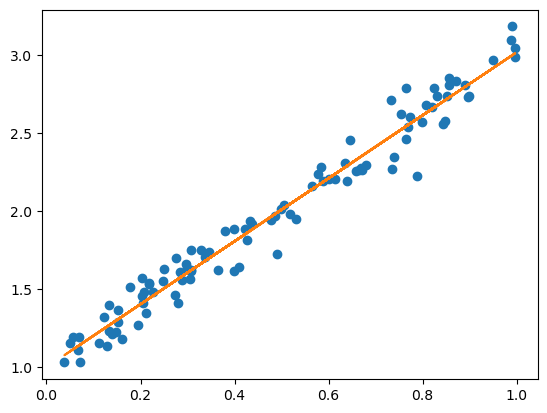

In [6]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
# 绘制原始数据点，参数'o'表示用圆点标记，展示真是数据的分布
plt.plot(x_tensor.numpy(),y_pred.detach().numpy())
# x_tensor.numpy()：将PyTorch张量x_tensor转换为Numpy数组，以便于matplotlib处理
# detach()用于分离张量，使其不参与梯度计算
plt.show()

In [7]:
import torch.nn as nn
x = np.random.rand(100,1)
y = 1 + 2 * x + 0.1 * np.random.randn(100,1)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

learning_rate = 0.1
num_epochs = 1000

input_dim = 1
output_dim = 1

model = nn.Linear(input_dim, output_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_tensor)

    loss = criterion(y_pred,y_tensor)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

print('w:',model.weight.data)
print('b:',model.bias.data)
    

w: tensor([[1.9628]])
b: tensor([1.0178])
